In [4]:
import numpy as np
import pandas as pd 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [6]:
df = pd.read_csv("vaccinations.csv")

In [7]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [8]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     38681
people_vaccinated                      40822
people_fully_vaccinated                43276
daily_vaccinations_raw                 46273
daily_vaccinations                       313
total_vaccinations_per_hundred         38681
people_vaccinated_per_hundred          40822
people_fully_vaccinated_per_hundred    43276
daily_vaccinations_per_million           313
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [9]:
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [10]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79486 entries, 0 to 79485
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              79486 non-null  object 
 1   iso_code                             79486 non-null  object 
 2   date                                 79486 non-null  object 
 3   total_vaccinations                   79486 non-null  float64
 4   people_vaccinated                    79486 non-null  float64
 5   people_fully_vaccinated              79486 non-null  float64
 6   daily_vaccinations_raw               79486 non-null  float64
 7   daily_vaccinations                   79486 non-null  float64
 8   total_vaccinations_per_hundred       79486 non-null  float64
 9   people_vaccinated_per_hundred        79486 non-null  float64
 10  people_fully_vaccinated_per_hundred  79486 non-null  float64
 11  daily_vaccinations_per_milli

In [12]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [13]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [14]:
df.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred",
         "daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

In [15]:
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
75691,United States,USA,2020-12-13,28342.0,23687.0,0.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
75692,United States,USA,2020-12-14,32880.0,28068.0,4538.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
75693,United States,USA,2020-12-15,82521.0,75383.0,27090.0,0.02,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
75694,United States,USA,2020-12-16,242204.0,229681.0,71287.0,0.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
75695,United States,USA,2020-12-17,514483.0,494864.0,121535.0,0.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
76125,United States,USA,2022-02-20,551354194.0,253179626.0,331857.0,166.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
76126,United States,USA,2022-02-21,551622002.0,253248859.0,324325.0,166.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
76127,United States,USA,2022-02-22,551819810.0,253298776.0,299122.0,166.21,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
76128,United States,USA,2022-02-23,551855907.0,253307984.0,250164.0,166.22,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [16]:
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace = True)

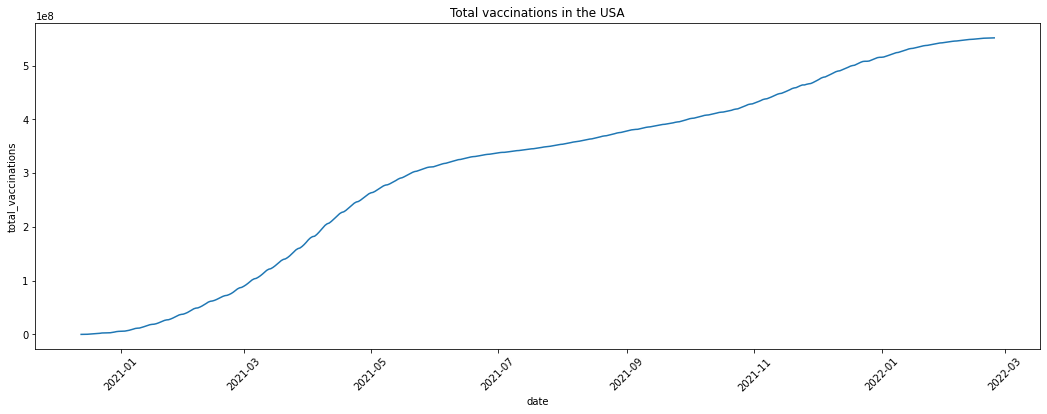

In [17]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in the USA')

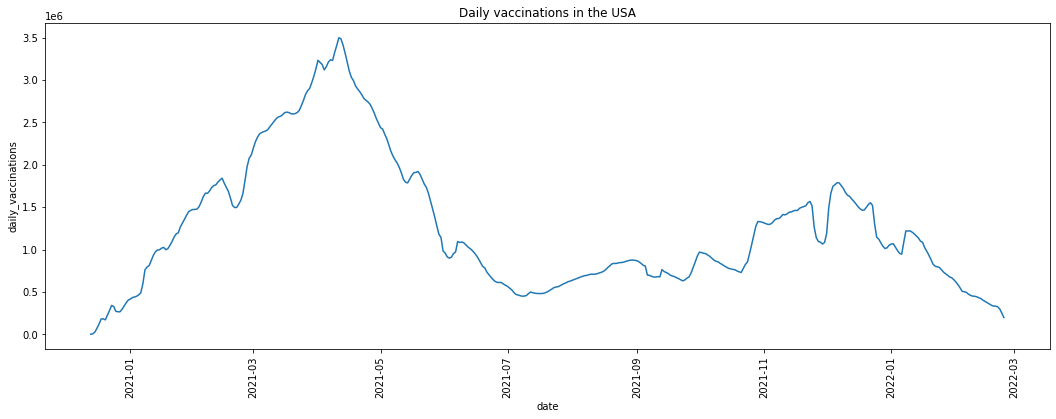

In [18]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the USA")

**India**

In [19]:
df_India = df[df["iso_code"] == 'IND'].copy()
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
32467,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32468,India,IND,2021-01-16,1.911810e+05,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32469,India,IND,2021-01-17,2.243010e+05,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32470,India,IND,2021-01-18,4.540490e+05,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32471,India,IND,2021-01-19,6.748350e+05,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...
32868,India,IND,2022-02-20,1.753407e+09,962616766.0,3642105.0,125.84,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32869,India,IND,2022-02-21,1.755791e+09,962967313.0,3723058.0,126.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32870,India,IND,2022-02-22,1.759523e+09,963517480.0,3350608.0,126.27,"Covaxin, Oxford/AstraZeneca, Sputnik V"
32871,India,IND,2022-02-23,1.761691e+09,963841804.0,3291554.0,126.43,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [20]:
df_India.drop(df_India.index[df_India['total_vaccinations'] == 0], inplace = True)

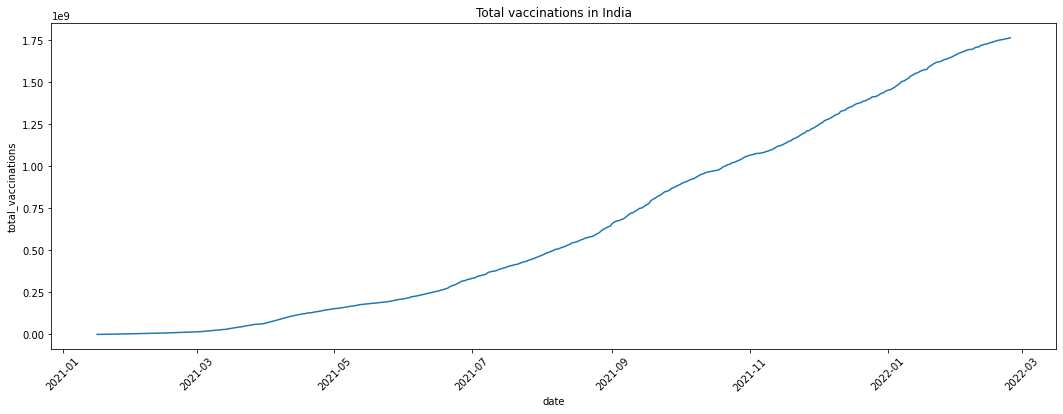

In [21]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in India')

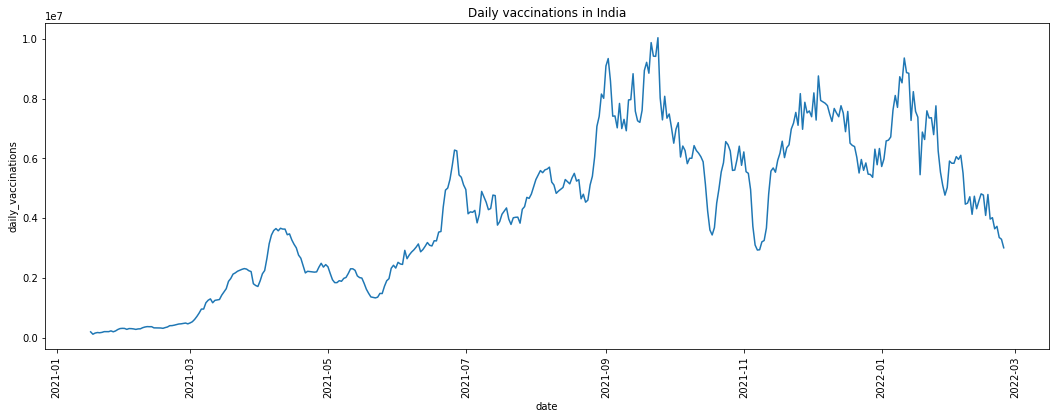

In [22]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")

In [23]:
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]
vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-02-24,3.108286e+09,1.268180e+09,22424286.0,215.22,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-02-24,1.764971e+09,9.643046e+08,10037995.0,126.67,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-02-24,5.518559e+08,2.533080e+08,3500872.0,166.22,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-02-24,3.897484e+08,1.771745e+08,1941268.0,182.13,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-02-24,3.433536e+08,1.903105e+08,1897011.0,124.24,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-02-24,2.238208e+08,1.016722e+08,1997542.0,177.56,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Pakistan,PAK,2022-02-21,2.094386e+08,1.243097e+08,2175773.0,93.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-02-23,1.926773e+08,7.946214e+07,1675471.0,196.27,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Bangladesh,BGD,2022-02-22,1.846058e+08,1.033589e+08,1994776.0,111.01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


In [24]:
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-02-24,3.108286e+09,1.268180e+09,22424286.0,215.22,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Vietnam,VNM,2022-02-23,1.926773e+08,7.946214e+07,1675471.0,196.27,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Brazil,BRA,2022-02-24,3.897484e+08,1.771745e+08,1941268.0,182.13,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2022-02-24,2.238208e+08,1.016722e+08,1997542.0,177.56,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
United States,USA,2022-02-24,5.518559e+08,2.533080e+08,3500872.0,166.22,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Mexico,MEX,2022-02-23,1.792743e+08,8.508365e+07,1648223.0,137.63,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
India,IND,2022-02-24,1.764971e+09,9.643046e+08,10037995.0,126.67,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Indonesia,IDN,2022-02-24,3.433536e+08,1.903105e+08,1897011.0,124.24,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Bangladesh,BGD,2022-02-22,1.846058e+08,1.033589e+08,1994776.0,111.01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


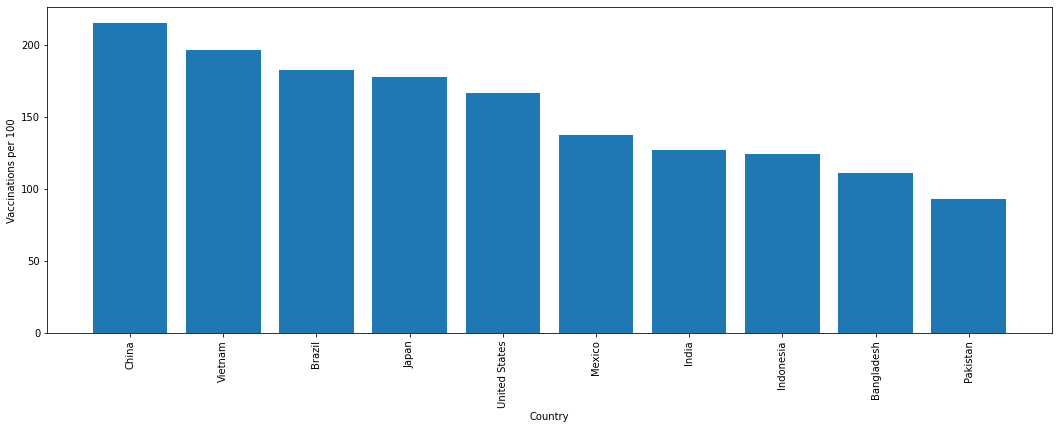

In [25]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)

plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

In [26]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:10]
total_vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-02-24,3.108286e+09,1.268180e+09,22424286.0,215.22,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-02-24,1.764971e+09,9.643046e+08,10037995.0,126.67,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-02-24,5.518559e+08,2.533080e+08,3500872.0,166.22,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-02-24,3.897484e+08,1.771745e+08,1941268.0,182.13,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-02-24,3.433536e+08,1.903105e+08,1897011.0,124.24,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-02-24,2.238208e+08,1.016722e+08,1997542.0,177.56,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Pakistan,PAK,2022-02-21,2.094386e+08,1.243097e+08,2175773.0,93.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-02-23,1.926773e+08,7.946214e+07,1675471.0,196.27,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Bangladesh,BGD,2022-02-22,1.846058e+08,1.033589e+08,1994776.0,111.01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


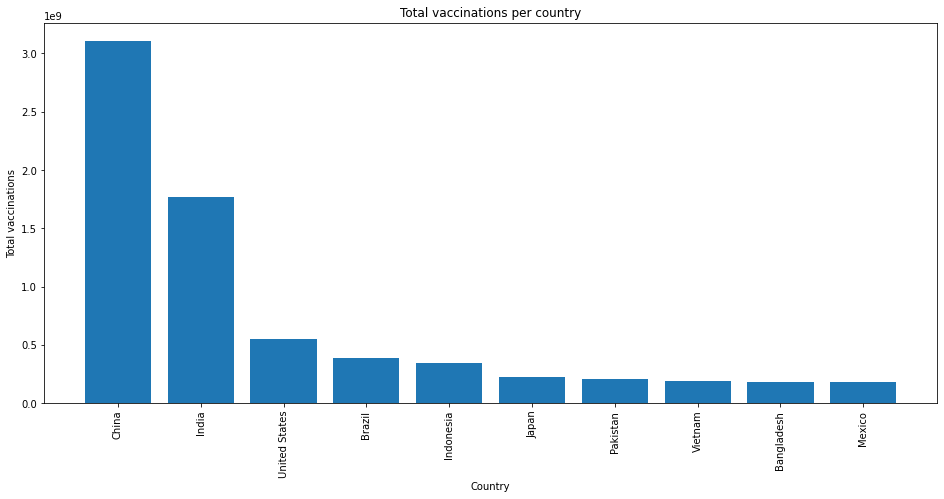

In [27]:

plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)

plt.title('Total vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Country')
plt.show()

In [28]:
vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-02-24,3.108286e+09,1.268180e+09,22424286.0,215.22
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-02-24,1.764971e+09,9.643046e+08,10037995.0,126.67
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-02-24,5.518559e+08,2.533080e+08,3500872.0,226.49
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-02-24,3.897484e+08,1.771745e+08,1941268.0,182.13
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-02-24,3.433536e+08,1.903105e+08,1897011.0,124.24


In [29]:
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-02-24,3.108286e+09,1.268180e+09,22424286.0,215.22
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-02-24,1.764971e+09,9.643046e+08,10037995.0,126.67
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-02-24,5.518559e+08,2.533080e+08,3500872.0,226.49
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-02-24,3.897484e+08,1.771745e+08,1941268.0,182.13
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-02-24,3.433536e+08,1.903105e+08,1897011.0,124.24
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-02-24,2.238208e+08,1.016722e+08,1997542.0,233.03
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2022-02-21,2.094386e+08,1.243097e+08,2175773.0,93.00
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Vietnam,VNM,2022-02-23,1.926773e+08,7.946214e+07,1675471.0,196.27
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Thailand,THA,2022-02-24,1.846058e+08,1.033589e+08,1994776.0,175.61


In [30]:
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2022-02-24,3.108286e+09,1.268180e+09,22424286.0,215.22
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-02-24,1.764971e+09,9.643046e+08,10037995.0,126.67
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-02-24,5.518559e+08,2.533080e+08,3500872.0,226.49
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2022-02-24,3.897484e+08,1.771745e+08,1941268.0,182.13
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Indonesia,IDN,2022-02-24,3.433536e+08,1.903105e+08,1897011.0,124.24
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-02-24,2.238208e+08,1.016722e+08,1997542.0,233.03
6,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2022-02-21,2.094386e+08,1.243097e+08,2175773.0,93.00
7,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2022-02-23,1.926773e+08,7.946214e+07,1675471.0,196.27
8,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Thailand,THA,2022-02-24,1.846058e+08,1.033589e+08,1994776.0,175.61
9,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2022-02-23,1.792743e+08,8.508365e+07,1648223.0,137.63


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

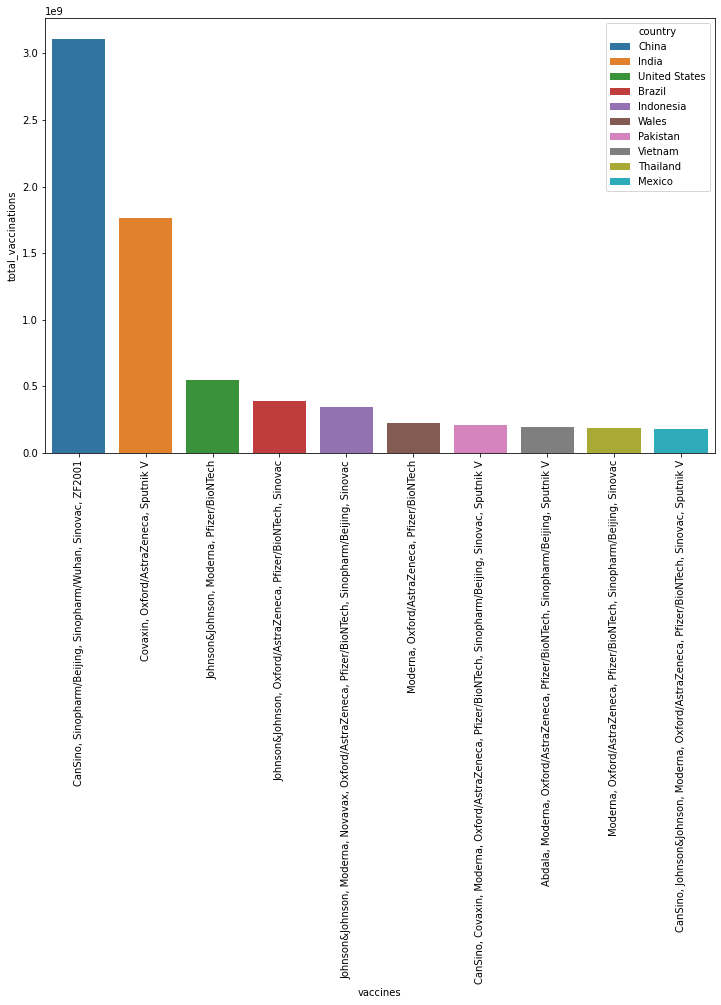

In [31]:
plt.figure(figsize=(12,8))

sns.barplot(data = vacc_names_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

In [32]:
fig = px.choropleth(df.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) 
fig.show()